## 실버존(Silver Zone)
황수영 신선민 박범진 이정우


# 서울이 과연 노인들이 살기 좋은 곳인가?

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

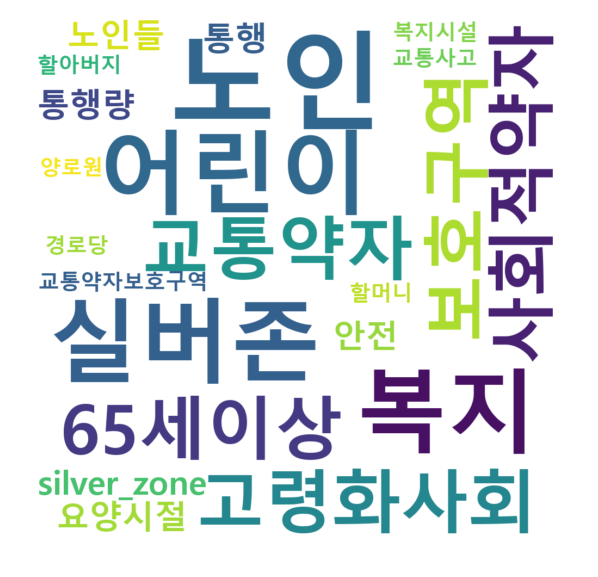

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

text = "노인 노인 노인 어린이 어린이 65세이상 고령화사회 복지 실버존 보호구역 교통약자 사회적약자 실버존 silver_zone 요양시절 노인들 안전 통행 통행량 교통약자보호구역 복지시설 복지 교통사고 양로원 경로당 할머니 할아버지 "

# Generate a word cloud image
wordcloud = WordCloud(font_path = ' C:\\Windows\\Fonts\\malgunbd.ttf',
                      background_color = 'white',
                      width = 1000,
                      height = 1000,
                      max_font_size=200).generate(text)

# Display the generated image:
# the matplotlib way:

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


sbs 데이터저널리즘팀에서 민식이법으로 촉발된 어린이 교통안전 문제를 집중 조명했다. 이어서 또 다른 교통 약자인 노인의 안전 문제를 점검한다. 최근 13년 간 노인 교통사고 데이터와 서울시 생활인구 데이터를 살폈고, GIS 분석 기법을 통해 노인보호구역의 실태와 사각지대를 확인했다.

## 실버존(silver zone)   
노인보호구역이란 교통약자인 노인을 교통사고 위험에서 **보호**하기 위해 양로원, 경로당, 노인복지시설 등 노인들의 **통행량이 많은 구역**을 선정하여 **노인들의 안전한 통행**을 보장하고자 하는 지정된 **교통약자보호구역**으로 **실버존(Silver Zone)**이라고도 한다.   



- 총 인구 수 감소 & 노인 수 증가
- 총 인구 수 대비 노인 인구 수 비율 증가

<div style = "float:left;">
    <img src = './img/total_increase.png'  width = '450' > 
</div>
<div style = "float:left;">
    <img src = './img/ratio_increase.png'  width = '450' >
</div>

- 서울시 고령자 현황 통계 (서울시 공공데이터 포털)

##  아이는 줄고, 노인은 늘고

<img src='./img/child_old.png' width = '350'> 

## 노인 보호 구역, 어린이 구역의 11.4 %

In [11]:
import pandas as pd
import numpy as np
old = pd.read_csv("data\\전국노인장애인보호구역표준데이터.csv",encoding = 'cp949',engine = 'python')
old_seoul = old[old['시도명'] == '서울특별시']
old_seoul.rename(columns = {'시군구명' : '지역구'}, inplace = True)
old_seoul.loc[old_seoul["지역구"] == "서울특별시 노원구","지역구"] = '노원구'
X_Y = old_seoul[['지역구','위도','경도']]

young = pd.read_csv('data\\전국어린이보호구역표준데이터.csv', encoding = 'cp949',engine='python')
young_seoul = young.loc[young['소재지도로명주소'].str.contains('서울특별시',na=False)]
young_seoul['자치구'] = young_seoul['소재지도로명주소'].str.split(" ").str[1]
young_seoul['자치구'] = young_seoul['자치구'].str.replace('덕릉로62길','도봉구')

young_seoul = young_seoul.rename({'지역구':'자치구'},axis='columns')
X_Y_young = young_seoul[['자치구','위도','경도']]


import folium 
from folium import plugins

m = folium.Map(location=[37.5502, 126.982], 
                           tiles='cartodbpositron', zoom_start=10) 

folium.TileLayer('openstreetmap').add_to(m) 

fg = folium.FeatureGroup(name='보호구역') 
m.add_child(fg)


g1 = plugins.FeatureGroupSubGroup(fg, '노인 보호구역') 
m.add_child(g1)
g2 = plugins.FeatureGroupSubGroup(fg, '어린이 보호구역')
m.add_child(g2)

for row in X_Y.values:
    folium.Circle(
      [row[1],row[2]],
      radius=200,
      color = 'red'
    ).add_to(g1)  

for row in X_Y_young.values:
    folium.Circle(
      [row[1],row[2]],
      radius=200,
    ).add_to(g2)    
    

folium.LayerControl(collapsed=False).add_to(m)
m

<img src = './img/difference_protection_facility_old_and_young.png'>

## 노인 교통 사고가 많은 곳은 어디?

- 교통 사고가 많은 지역 파악

1. 강남구 
2. 서초구 
3. 송파구
4. 영등포구
5. 강서구

In [9]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import json

geo_path = 'data\\02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

prot_df = pd.read_csv('data\\seoul_protection_facility.csv', index_col = 0)
accident_df =  pd.read_csv('data\\total.csv',header=None)

#filtering
try:
    accident_df = accident_df.drop(0 ,axis=0)
    accident_df = accident_df.drop(1 ,axis=0)
except:
    pass

# Edit index
accident_df = accident_df.set_index(7)

df_total = pd.concat([accident_df, prot_df],  axis = 1)[[6,'노인','어린이']]
df_total[6]=df_total[6].astype(int)

map_acc = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map_acc.choropleth(geo_data = geo_str,
               data = df_total[6],
               columns = [df_total.index, df_total[6]],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map_acc

## 노인 보호 구역 사각지대

### 자치구별 65세 이상 인구

<img src = './img/old_gu.png'>

### 노인 보호구역 수 / 65세 이상 인구
- 위 자료에 의하면 어린이에 비해 노인 보호구역은 현저히 부족함
- 자치구별 노령 인구 대비 보호구역 수 확인
- **강서구**가 **노령인구 대비 보호구역 수**가 제일 多    
    마포구, 서대문구, 둥구, 도봉구, 금천구는 **시설 자체가 갖춰져있지 않음**

In [10]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import json

geo_path = 'data\\02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

prot_df = pd.read_csv('data\\seoul_protection_facility.csv', index_col = 0)
accident_df =  pd.read_csv('data\\total.csv',header=None)

#filtering
try:
    accident_df = accident_df.drop(0 ,axis=0)
    accident_df = accident_df.drop(1 ,axis=0)
except:
    pass

# Edit index
accident_df = accident_df.set_index(7)

df_total = pd.concat([accident_df, prot_df],  axis = 1)[[6,'노인','어린이']]
df_total[6]=df_total[6].astype(int)

df_ratio = df_total['노인'].astype(int).div(df_total[6]).replace([np.inf, -np.inf],0)
df_ratio = df_ratio.to_frame('ratio')
map_blind = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map_blind.choropleth(geo_data = geo_str,
               data = df_ratio['ratio'],
               columns = [df_ratio.index, df_ratio['ratio']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map_blind

## 노인 교통사고 패턴 파악

### 2015~2019 서울시 노인교통사고 건수 증가 

<img src = './img/5년간_서울시_노인_교통사고건수.png'>

> 위 통계 자료에 노인운전자도 포함되어 있음

## 노인 교통사고를 요일, 월,  시간대별 자치구 사고건수 TOP5

>  ** 월별 **
- 패턴 없음

<img src = './img/강남구교통사고건수.png'>
<img src = './img/서초구교통사고건수.png'>
<img src = './img/송파구교통사고건수.png'>
<img src = './img/영등포구교통사고건수.png'>
<img src = './img/강서구교통사고건수.png'>

> **요일별**  
- 노인 : 평일에 교통 사고 건수 多
- 어린이 : 주말에 교통 사고 건수 多   
=> 노인과 어린이가 반대 양상을 보임 


<img src = './img/노인요일별.png'>
<img src = './img/어린이요일별.png'>

> **시간대별**

- Max시간에 노인들이 활동을 시작하는 시간임이라고 추측 가능
- 10시~12시, 14시~16시가 사고 건수 피크 타임 
- 12시~14시(피크타임 사이 시간)에는 항상 감소하는 양상을 볼 수 있음

<img src = './img/강남구시간별_교통사고건수.png'>
<img src = './img/서초구시간별_교통사고건수.png'>
<img src = './img/송파구시간별_교통사고건수.png'>
<img src = './img/영등포구시간별_교통사고건수.png'>
<img src = './img/강서구시간별_교통사고건수.png'>

## 복지는?!


### 의료 복지 시설
-  2016년이후 의료 복지시설 감소 추세


<img src = './img/total_facility.png'>

- 자치구별 의료 복지시설 수 (근 4년 간)      

<img src = './img/gu_facility.png'>

### 2019년 노인 의료 복지시설 수 TOP 5 는?
<img src = './img/welfare_gu_top5.png'>


### 2019년 노인 의료 복지시설 수 Low 5는?
<img src = './img/welfare_gu_low5.png'>


## 결론

- 고령인구 수 증가(총 인구 수는 감소하기 때문에 서울에서 노인이 차지하는 비율이 더욱 증가하고 있는 상황)
- 서울시 자치구 중 종로구, 중구, 용산구, 성동구, 광진구에 고령인구가 多
- 강서구가 노령인구 대비 보호구역 수가 제일 多, 마포구, 서대문구, 둥구, 도봉구, 금천구는 시설 자체가 갖춰져있지 않음을 알 수 있음.

- 노인 교통 사고 건수 증가
- 강남구, 서초구, 송파구, 영등포구, 강서구의 노인 교통 사고 건수가 제일 多
- 노인은 평일이 주말에 비해, 어린이는 주말이 평일에 비해 교통사고 건수가 상대적으로 多

- 서울시 총 의료복지시설 수 감소 추세
- 도봉구, 중랑구는 의료복지시설수 多
- 중구, 마포구는 의료복지시설수가 少


### 노인 보호 구역은 어린이 보호 구역의 11.4%로 상대적으로 부족
### 아이 수는 감소, 노인 수는 증가하고 있는 상황에서 어린이에 비해 노인과 관련된 시설, 보호 구역이 부족
### 사회적약자 중 노인에 대한 관심이 더욱 필요 & 노인을 위한 시설 등 마련의 필요성 증대